In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import statistics
from scipy import stats
import re
plt.rcParams["figure.figsize"] = [12, 8]
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_spss("Birthweight_reduced_kg_SPSS.sav")

### Q1. In your own words, describe what a residual is in linear regression.

A residual in linear regression is the difference between the observed value of a dependent variable (y) and the predicted value (ŷ) by the regression model. It represents the error or discrepancy between the actual and predicted values and can be used to evaluate the goodness of fit of the regression model.
Residual = Observed – Predicted

### Q2. If you know that your residual data follow the below pattern, are your data better approximated with a linear model for the lower values of independent variable or higher values of independent variable and why?

For  lower values of the independent variable, a linear model approximates the data better. The data pattern shows us that the error is larger for higher independent variable values.This is because the pattern has a parabolic pattern. At large values, the parabola is parallel to the x-axis. The error rate therefore increases. 

### Q3. What is the difference between R2 and adjusted R2?

Both R2 and the adjusted R2 give you an idea of how many data points fall within the line of the regression equation. However, there is one main difference between R2 and the adjusted R2: R2 assumes that every single variable explains the variation in the dependent variable. The adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable.

### Q4. Is there independence of observations if you are trying to predict baby length with mother’s height?

In [22]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.formula.api import ols

In [23]:
y_list = list(df["Length"])
y = np.asarray(y_list)
x_list = list(df['mheight'])
x = np.asarray(x_list)

In [18]:
# Using statsmodels.durbin_watson() method
model=ols('x ~ y',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     12.30
Date:                Wed, 01 Feb 2023   Prob (F-statistic):            0.00113
Time:                        21:39:09   Log-Likelihood:                -132.10
No. Observations:                  42   AIC:                             268.2
Df Residuals:                      40   BIC:                             271.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.2933     15.751      6.939      0.0

In [19]:
durbin_watson(model.resid)

1.8721266558506189

After using the Durbin-Watson statistic, the value should be around 2. Durbin Watson value is 1.8721266558506189 here. Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model. 

Yes, there is independence of observations if you are trying to predict baby length with mother’s height.

### Q5. Justify the above answer.

In [20]:
durbin_watson(model.resid)

1.8721266558506189

After using the Durbin-Watson statistic, the value should be around 2. Durbin Watson value is 1.8721266558506189 here. Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model. 

### Q6. Do residual data show homoscedasticity?

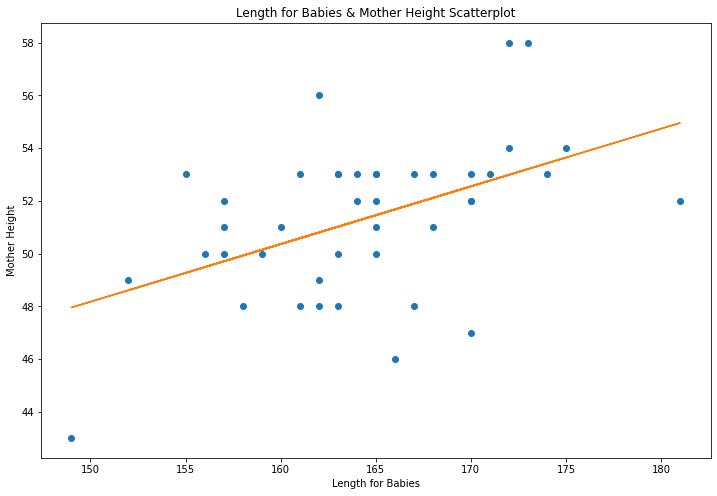

In [21]:
#create basic scatterplot
plt.plot(x, y, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel('Length for Babies')
plt.ylabel('Mother Height')
plt.title('Length for Babies & Mother Height Scatterplot');

Yes, residual data show homoscedasticity.

In [23]:
import statsmodels.api as sm

X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     12.30
Date:                Wed, 01 Feb 2023   Prob (F-statistic):            0.00113
Time:                        21:42:15   Log-Likelihood:                -98.689
No. Observations:                  42   AIC:                             201.4
Df Residuals:                      40   BIC:                             204.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3342     10.271      1.493      0.143      -5.425      36.093
x1             0.2189      0.062      3.507      0.001       0.093       0.345
==============================================================================
Omnibus:                        0.736   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.692   Jarque-Bera (JB):                0.358
Skew:                          -0.224   Prob(JB):                        0.836
Kurtosis:                       3.059   Cond. No.                     4.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

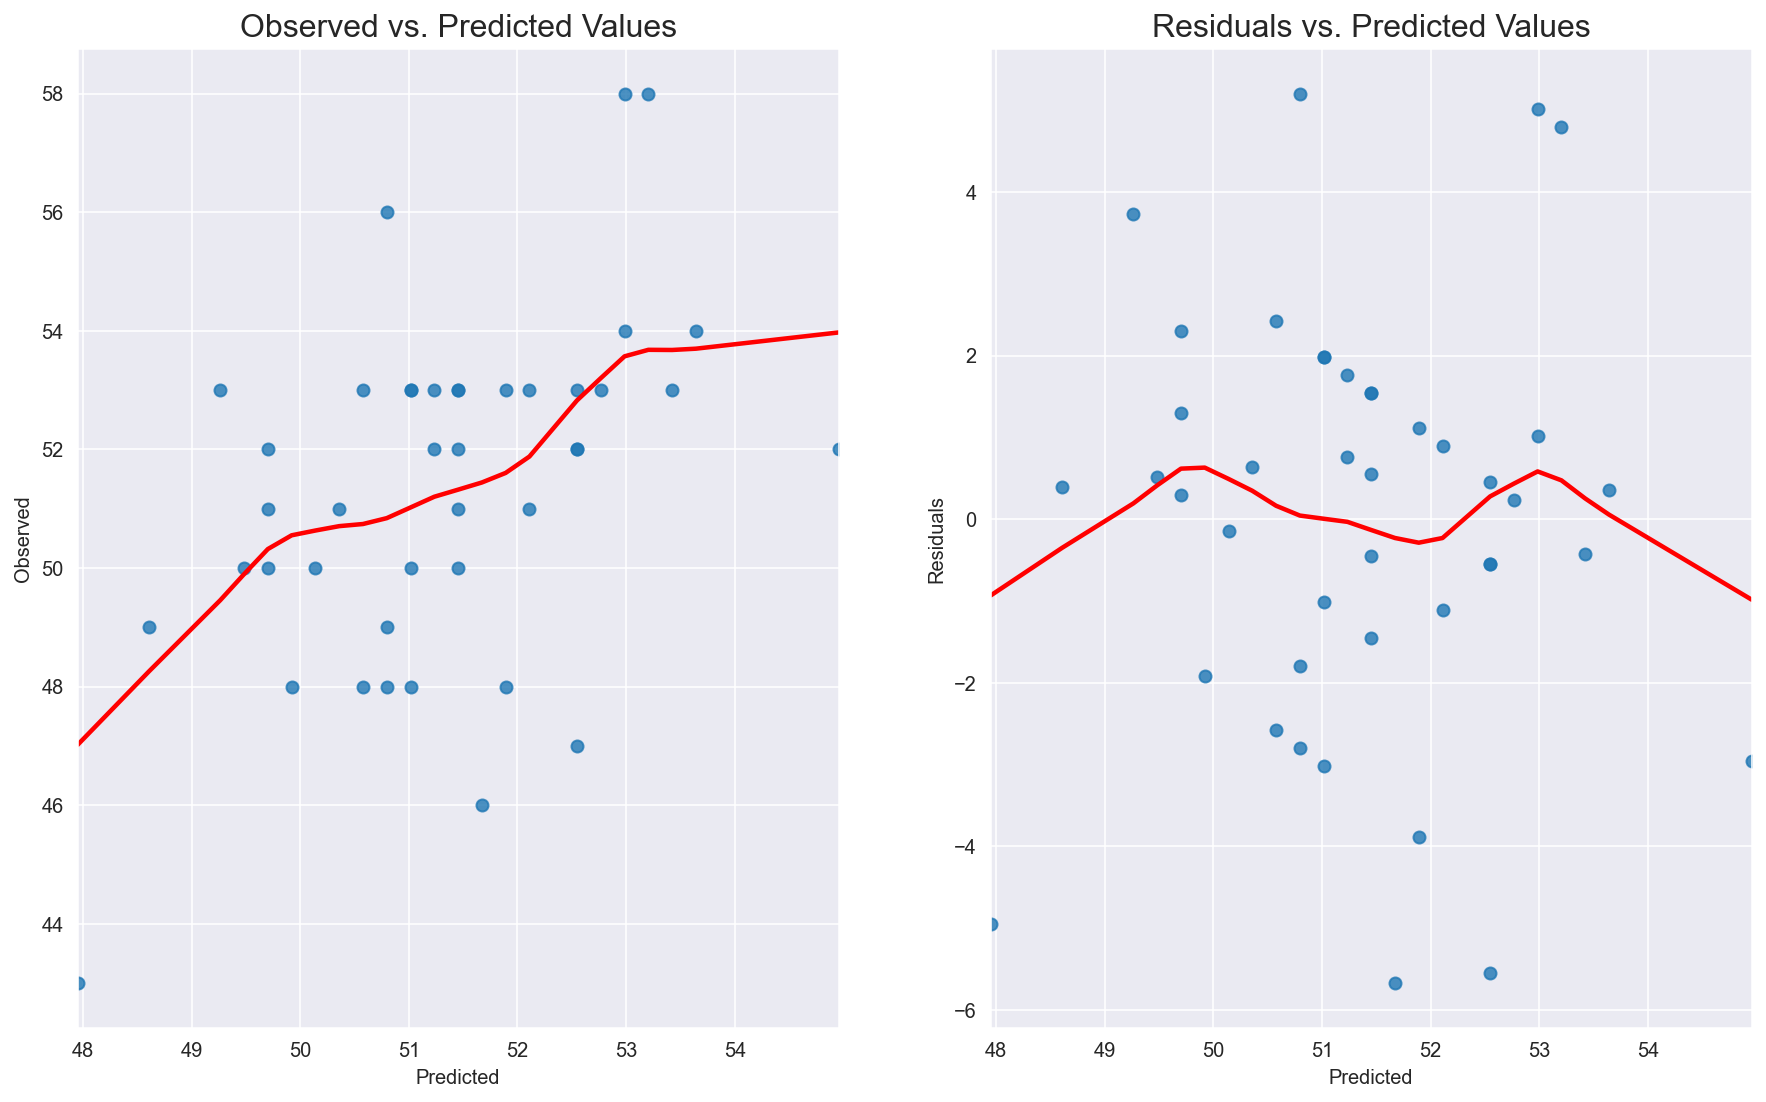

In [24]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

### Q7. Justify the above answer.

In [27]:
from statsmodels.stats.diagnostic import het_white

In [28]:
#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [29]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

In [30]:
#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 1.1225185363073773, 'Test Statistic p-value': 0.5704902111747454, 'F-Statistic': 0.5354809218722487, 'F-Test p-value': 0.5896297360053042}


Here is how to interpret the output:

The test statistic is X2 = 1.122.
The corresponding p-value is 0.570.
White’s test uses the following null and alternative hypotheses:

Null (H0): Homoscedasticity is present (residuals are equally scattered)
Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)

Since the p-value is not less than 0.05, we fail to reject the null hypothesis.

This means we do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

Yes, residual data show homoscedasticity.

### Q8. What is the value of R2 and what does this tell you?

In [31]:
from sklearn.metrics import r2_score

In [35]:
import scipy.integrate as integrate

In [53]:
import scipy
import numpy

In [56]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [57]:
rsquared(x, y)

0.235217630611391

In [54]:
corr_matrix = numpy.corrcoef(x_list, y_list)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.235217630611391


R squared value is 0.235. A high R squared indicates good regression model fit. 
If all points were on the regression line, we would have a perfect model. R squared would be equal to 1 when all points were on the line.

### Q9. Can you consider the relationship between mother’s height and baby length a statistically significant linear relationship and why?

P value needs to be <.05 for the model to be statistically
significant and for the relationship to be considered statistically
significant linear relationship. p < .001 so we consider the relationship between mother’s height and baby length a statistically significant linear relationship.

### Q10. Having the ANOVA table for the linear regression in mind, what is the null and alternative hypothesis in this case?

This means we do not have sufficient evidence to say that heteroscedasticity is present in the regression model.
F statistik value = 12.30 If we find 12.3 in F Table, critical F value is 3.49. The calculated F value is greater than the critical F value, it is in the nullhypothesis rejection area. In practical terms, there is no difference between the means. There is a significant difference between two of the group means compared.  

In [59]:
scipy.stats.f.ppf(q=1-0.05, dfn = x_list, dfd = y_list)

array([1.4645814 , 1.47547437, 1.45300275, 1.47460035, 1.46956668,
       1.48729792, 1.4848564 , 1.47731262, 1.47043629, 1.49518218,
       1.47763137, 1.48637447, 1.48253163, 1.48067469, 1.47668598,
       1.50598468, 1.50468176, 1.50313661, 1.47731262, 1.54119103,
       1.47577221, 1.48890985, 1.49257269, 1.49450649, 1.50436553,
       1.51553136, 1.50500173, 1.45270307, 1.47795382, 1.50239535,
       1.48221477, 1.48992361, 1.49552618, 1.49320229, 1.48068354,
       1.47861007, 1.48068354, 1.47759812, 1.49899447, 1.47795382,
       1.50818351, 1.47637795])

### Q11. In your own words, describe what the b1 is.

DEP. VAR = b0 + (b1 x IND.VAR)

The b1 value is a value in the regression function. It is the coefficient in front of the independent variable. The b1 value show us the slope of the regression curve. Each unit increase in the independent variable provides an increase of b1 in the dependent variable.

### Q12. What does the value of b1 tell you in practical terms?

In [60]:
m, b = np.polyfit(x, y, 1)

In [61]:
m

0.21890315052508758

In [62]:
b

15.33418903150523

y = mx + b

b1 value show us the slope of the regression curve. Each unit increase in the independent variable provides an increase of b1 in the dependent variable.

### Q13. Could you claim the same for the mother’s height in the range between 140cm and 145cm and why?

Yes, the regression curve can give us an estimate of baby length for different mother heights. For range between 140 cm and 145 cm we can find range 45.98 cm and 47.07 cm for baby length.

### Q14. According to this model, what is the prediction of baby length for mother’s height of 170cm?

In [70]:
Baby_length_170 = 0.21890315052508758 * 170 + 15.33418903150523

In [71]:
Baby_length_170

52.54772462077012

In [65]:
y

array([56., 53., 58., 53., 54., 51., 52., 53., 54., 50., 53., 51., 52.,
       53., 53., 48., 48., 48., 53., 43., 53., 51., 50., 50., 48., 46.,
       48., 58., 53., 49., 52., 51., 50., 50., 52., 53., 52., 52., 49.,
       53., 47., 53.])

### Q15. Report on your findings for predicting baby length with mother’s height.

A linear regression established that mother´s height could  statistically significantly predict baby length, F(1, 97) = 12.30, p < .001 and mother´s height accounted for 23.5% (R2 = 0.235) of the explained variability in baby length. The regression equation:predicted baby length = 15.334 + (0.219 x mother`s height).

### Q16. Can you predict baby length with father’s age? Why?

In [19]:
import statsmodels.api as sm

In [16]:
z_list =  list(df['fage'])

In [20]:
z = np.asarray(z_list)

In [24]:
X_constant = sm.add_constant(x)
lin_reg = sm.OLS(z,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.2568
Date:                Fri, 03 Feb 2023   Prob (F-statistic):              0.615
Time:                        21:36:13   Log-Likelihood:                -139.86
No. Observations:                  42   AIC:                             283.7
Df Residuals:                      40   BIC:                             287.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.7662     27.374      1.562      0.126     -12.559      98.091
x1            -0.0843      0.166     -0.507      0.615      -0.420       0.252
==============================================================================
Omnibus:                        2.828   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                2.427
Skew:                           0.481   Prob(JB):                        0.297
Kurtosis:                       2.322   Cond. No.                     4.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Using statsmodels.durbin_watson() method
model=ols('x ~ z',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.2568
Date:                Fri, 03 Feb 2023   Prob (F-statistic):              0.615
Time:                        21:38:17   Log-Likelihood:                -137.60
No. Observations:                  42   AIC:                             279.2
Df Residuals:                      40   BIC:                             282.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    166.6400      4.434     37.582      0.0

In [74]:
corr_matrix = numpy.corrcoef(x_list, z_list)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.006379200097216659


P value needs to be <.05 for the model to be statistically significant. p(0.615) > .05 so we consider the relationship between father’s height and baby length is not a statistically significant linear relationship. Therefore we can not good predict baby length with father`s age.

In [76]:
df.corr()

,ID,Headcirc,Length,Birthweight,Gestation,mage,mheight,mppwt,fage,fedyrs,fnocig,fheight,mnocig
ID,1.000000,-0.044899,0.192635,0.111211,0.102714,-0.186426,-0.010893,-0.026516,-0.231958,0.119927,-0.112889,0.089018,-0.194625
Headcirc,-0.044899,1.000000,0.563172,0.684616,0.404635,0.145842,0.337047,0.302854,0.301151,0.123892,-0.046837,0.041509,-0.132988
Length,0.192635,0.563172,1.000000,0.726833,0.705111,0.075268,0.484992,0.398197,0.137184,0.079485,0.008800,0.208358,-0.039843
Birthweight,0.111211,0.684616,0.726833,1.000000,0.708303,0.000173,0.363055,0.400886,0.175710,0.071045,-0.093136,0.031022,-0.152335
Gestation,0.102714,0.404635,0.705111,0.708303,1.000000,0.010778,0.210503,0.255082,0.142175,0.130987,-0.113831,0.207597,0.043195
mage,-0.186426,0.145842,0.075268,0.000173,0.010778,1.000000,0.059956,0.274168,0.806584,0.441683,0.090927,-0.199547,0.340294
mheight,-0.010893,0.337047,0.484992,0.363055,0.210503,0.059956,1.000000,0.680622,-0.079870,0.035297,0.048398,0.274338,0.126439
mppwt,-0.026516,0.302854,0.398197,0.400886,0.255082,0.274168,0.680622,1.000000,0.255706,0.180374,0.057163,0.092983,0.148945
fage,-0.231958,0.301151,0.137184,0.175710,0.142175,0.806584,-0.079870,0.255706,1.000000,0.300471,0.135862,-0.269377,0.248425
fedyrs,0.119927,0.123892,0.079485,0.071045,0.130987,0.441683,0.035297,0.180374,0.300471,1.000000,-0.263103,0.017798,0.198526


### Q17. What does homogeneity of variance mean and why is it important assumption of an independent t-test?

Homogeneity of variance refers to the equal spread of data or equality of variance within a dataset. The lack of homogeneity of variance is known as heteroscedasticity.

The independent t-test assumes homogeneity of variances as one of its conditions for using the test. Homogeneity of variances means that the spread of data in each group being compared is similar. If the variances between groups are not equal, the t-test may produce incorrect results, as it assumes equal variances to calculate the t-statistic and p-value. Hence, the assumption of homogeneity of variance is important for the independent t-test because it ensures the validity and accuracy of the results.

### Q18. Is there homogeneity of variance between head circumference for babies of smoking mothers and head circumference for babies of non-smoking mothers?

No

### Q19. Justify your choice.

In [80]:
df_non_smoker = df[(df.smoker == 'Non-smoker')]

In [81]:
df_smoker = df[(df.smoker == 'Smoker')]

In [82]:
Baby_Headcirc_Non_Smoker = list(df_non_smoker["Headcirc"])

In [83]:
Baby_Headcirc_Smoker = list(df_smoker["Headcirc"])

In [86]:
def check_homogeneity(Baby_Headcirc_Smoker, Baby_Headcirc_Non_Smoker):
    return set(Baby_Headcirc_Smoker).issubset(set(Baby_Headcirc_Non_Smoker))

In [87]:
result = check_homogeneity(Baby_Headcirc_Smoker, Baby_Headcirc_Non_Smoker)

In [88]:
print(result)

False


### Q20. Do smokers have lighter babies? Justify your answer.

In [89]:
Baby_Birthweight_Non_Smoker = list(df_non_smoker["Birthweight"])

In [90]:
Baby_Birthweight_Smoker = list(df_smoker["Birthweight"])

In [96]:
mean_nons = statistics.mean(Baby_Birthweight_Non_Smoker)
mean_nons

3.5095

In [97]:
mean_s = statistics.mean(Baby_Birthweight_Smoker)
mean_s

3.1340909090909093

### Q21. Do women over 35 have lighter babies? Justify your answer.

In [98]:
df[df['mage'] <= 35 ].shape[0]

39

In [99]:
df[df['mage'] > 35 ].shape[0]

3

In [100]:
df_mother_young = df[(df.mage <= 35)]

In [105]:
Baby_Birthweight_Young = list(df_mother_young["Birthweight"])

In [101]:
df_mother = df[(df.mage > 35)]

In [106]:
Baby_Birthweight_Old = list(df_mother["Birthweight"])

In [107]:
mean_3 = statistics.mean(Baby_Birthweight_Young)
mean_3

3.3535897435897435

In [108]:
mean_4 = statistics.mean(Baby_Birthweight_Old)
mean_4

2.783333333333333

Yes, women over 35 have lighter babies. 

### Q22. Using the cholesterol dataset, was the diet effective in lowering cholesterol concentration after 8 weeks of use? Justify your answer.

In [8]:
df_2 = pd.read_spss('Cholesterol_SPSS.sav')
df_2.head()

,ID,Before,After4weeks,After8weeks,Margarine
0,1.0,6.42,5.83,5.75,B
1,2.0,6.76,6.20,6.13,A
2,3.0,6.56,5.83,5.71,B
3,4.0,4.80,4.27,4.15,A
4,5.0,8.43,7.71,7.67,B


In [9]:
Before = list(df_2['Before'])

In [111]:
mean_5 = statistics.mean(Before)
mean_5

6.407777777777778

In [10]:
After4weeks = list(df_2['After4weeks'])

In [114]:
mean_6 = statistics.mean(After4weeks)
mean_6

5.841666666666667

In [11]:
After8weeks = list(df_2['After8weeks'])

In [116]:
mean_7 = statistics.mean(After8weeks)
mean_7

5.778888888888889

Yes, the diet was effective in lowering cholesterol concentration after 8 weeks of use.

### Q23. For the above case, what is the null and alternative hypothesis? 

Null hypothesis: Data are normally distributed. The diet was effective in lowering cholesterol concentration after 8 weeks of use.

Alternative Hypotheses: Data are not normally distributed.

In [12]:
shapiro_test = stats.shapiro(After8weeks)
shapiro_test

ShapiroResult(statistic=0.977325439453125, pvalue=0.9183036088943481)

0.91 > 0.05 so we will accept Null hypotheses.

### Q24. Was the margarine diet more effective after the first 4 weeks of use or after the last 4 weeks of use? Justify your answer.

In [14]:
result_2 = stats.ttest_rel(After4weeks, After8weeks)
result_2

Ttest_relResult(statistic=3.78090274293469, pvalue=0.0014914189618696698)

Null Hypothesis: True difference in means is to 0. 
Alternative Hypotheses: True difference in means is not equal to 0.
After using dependent means t-test, the p-value is 0.00149, which is super close to 0. Therefore, our null hypothesis is rejected.

### Q25. If you know that the average cholesterol concentration in healthy adults is 3 mmol/L, would you consider your sample (N=18) significantly better or worse than average adult population? Justify your answer.

In [27]:
t = stats.ttest_ind(After4weeks, After8weeks)
t

Ttest_indResult(statistic=0.16926040598894462, pvalue=0.8665948466094726)

Null Hypothesis: True difference in means is to 0. Alternative Hypotheses: True difference in means is not equal to 0. After using dependent means t-test, the p-value is  close to 0. Therefore, our null hypothesis is rejected. Our sample significantly better or worse than average adult population.